# Telecom Churn Case Study

Business Objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
# read data
path = "C:\\Users\\adithya\\OneDrive\\Desktop\\ML assignments\\telecom_churn_data.csv"
data = pd.read_csv(path)

In [3]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
data.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [6]:
data.shape

(99999, 226)

## Filtering High Value Customers

High Value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [7]:

# Get the average recharge amount for 6 and 7 month
data['avg_rech_amt_6_7'] = ( data['total_rech_amt_6'] + data['total_rech_amt_7'] ) / 2

# Get the data greater than 70th percentile of average recharge amount
data = data.loc[(data['avg_rech_amt_6_7'] > np.percentile(data['avg_rech_amt_6_7'], 70))]

In [8]:
data.shape

(29979, 227)

## Data Cleaning

#### Check the columns having unique values. Drop them

In [9]:
uni_cols = [col for col in data.columns if data[col].nunique() ==1]
        

In [10]:
data.drop(uni_cols,axis=1,inplace=True)

In [11]:
# drop mobile number as it is ID column

data.drop('mobile_number',axis=1,inplace=True)

### Handling Missing Values

In [12]:
missingval = round(100*data.isnull().sum()/len(data.index),2)
missingval.loc[missingval > 0].sort_values(ascending=False)

arpu_2g_6                   62.02
max_rech_data_6             62.02
date_of_last_rech_data_6    62.02
fb_user_6                   62.02
av_rech_amt_data_6          62.02
count_rech_2g_6             62.02
night_pck_user_6            62.02
total_rech_data_6           62.02
count_rech_3g_6             62.02
arpu_3g_6                   62.02
count_rech_3g_9             61.82
max_rech_data_9             61.82
av_rech_amt_data_9          61.82
fb_user_9                   61.82
total_rech_data_9           61.82
arpu_3g_9                   61.82
arpu_2g_9                   61.82
date_of_last_rech_data_9    61.82
night_pck_user_9            61.82
count_rech_2g_9             61.82
total_rech_data_7           61.13
date_of_last_rech_data_7    61.13
count_rech_2g_7             61.13
max_rech_data_7             61.13
count_rech_3g_7             61.13
arpu_3g_7                   61.13
fb_user_7                   61.13
arpu_2g_7                   61.13
night_pck_user_7            61.13
av_rech_amt_da

### Dropping all column having more than 60% of missing values 

In [13]:
dropcols = missingval.loc[missingval > 60].index
dropcols

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [14]:
data.drop(dropcols,axis=1,inplace=True)
data.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.

In [15]:
data.shape

(29979, 170)

### Check remaining missing values

In [16]:
missingval = round(100*data.isnull().sum()/len(data.index),2)
missingval.loc[missingval > 0].sort_values(ascending=False)

isd_og_mou_9           5.68
loc_og_t2t_mou_9       5.68
loc_og_t2m_mou_9       5.68
std_ic_t2m_mou_9       5.68
std_ic_t2t_mou_9       5.68
loc_og_t2c_mou_9       5.68
loc_ic_mou_9           5.68
loc_og_mou_9           5.68
loc_ic_t2f_mou_9       5.68
std_og_t2t_mou_9       5.68
loc_ic_t2m_mou_9       5.68
std_og_t2m_mou_9       5.68
loc_ic_t2t_mou_9       5.68
std_og_t2f_mou_9       5.68
og_others_9            5.68
std_og_mou_9           5.68
spl_og_mou_9           5.68
std_ic_t2f_mou_9       5.68
loc_og_t2f_mou_9       5.68
isd_ic_mou_9           5.68
onnet_mou_9            5.68
std_ic_mou_9           5.68
roam_og_mou_9          5.68
roam_ic_mou_9          5.68
ic_others_9            5.68
offnet_mou_9           5.68
spl_ic_mou_9           5.68
offnet_mou_8           3.13
loc_ic_t2m_mou_8       3.13
std_og_t2m_mou_8       3.13
loc_og_t2t_mou_8       3.13
loc_ic_t2t_mou_8       3.13
std_og_t2f_mou_8       3.13
isd_ic_mou_8           3.13
og_others_8            3.13
std_og_mou_8        

We have date_of_last_rech columns. Let derive new categorical column rech_ind from date column ( 0-not recharged , 1-recharged).  When last recharge date is NULL , customers has not recharged. Hence we can make rech_ind as 0 in that case

In [17]:
data['rech_ind_6'] = np.where(data['date_of_last_rech_6'].isnull(),1,0) 
data['rech_ind_7'] = np.where(data['date_of_last_rech_7'].isnull(),1,0) 
data['rech_ind_8'] = np.where(data['date_of_last_rech_8'].isnull(),1,0)
data.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,rech_ind_6,rech_ind_7,rech_ind_8
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,0,0,0
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,

In [18]:
## Lets drop Data columns as we have derived new columns from Date field
data.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'],axis=1,inplace=True)

In [19]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 169 columns):
 #   Column              Dtype  
---  ------              -----  
 0   arpu_6              float64
 1   arpu_7              float64
 2   arpu_8              float64
 3   arpu_9              float64
 4   onnet_mou_6         float64
 5   onnet_mou_7         float64
 6   onnet_mou_8         float64
 7   onnet_mou_9         float64
 8   offnet_mou_6        float64
 9   offnet_mou_7        float64
 10  offnet_mou_8        float64
 11  offnet_mou_9        float64
 12  roam_ic_mou_6       float64
 13  roam_ic_mou_7       float64
 14  roam_ic_mou_8       float64
 15  roam_ic_mou_9       float64
 16  roam_og_mou_6       float64
 17  roam_og_mou_7       float64
 18  roam_og_mou_8       float64
 19  roam_og_mou_9       float64
 20  loc_og_t2t_mou_6    float64
 21  loc_og_t2t_mou_7    float64
 22  loc_og_t2t_mou_8    float64
 23  loc_og_t2t_mou_9    float64
 24  loc_og_t2m_mou_6    float64

## Impute Remaining Values using MICE 

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [21]:
data_cols = data.columns

# # using MICE technique to impute missing values in the rest of the columns
# import fancyimpute
# from fancyimpute import IterativeImputer as MICE
from sklearn.impute import IterativeImputer

churn_imputed = IterativeImputer().fit_transform(data)


In [23]:
data_churn = data_churn_imp

In [24]:
# convert imputed numpy array to pandas dataframe
data_churn_imp = pd.DataFrame(churn_imputed, columns=data_cols)
print(data_churn.isnull().sum()*100/data_churn.shape[0])

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8

Now we have cleaned our Data. Lets find the Target column Churn

### Classify Churn and Non-Churn

Tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [25]:
churn_cols = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

data_churn['churn'] = data_churn[churn_cols].sum(axis=1).apply(lambda x : 1 if x ==0 else 0)

data_churn.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,rech_ind_6,rech_ind_7,rech_ind_8,churn
0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,-233.573187,453.43,567.16,325.91,239.237664,16.23,33.49,31.64,35.489397,23.74,12.59,38.06,-12.86841,51.39,31.38,40.28,-194.623954,308.63,447.38,162.28,166.526577,62.13,55.14,53.23,7.466133,0.0,0.0,0.00,1.201979,422.16,533.91,255.79,-20.606412,4.30,23.29,12.01,33.230473,49.89,31.76,49.14,167.795071,6.66,20.08,16.68,1.899372,60.86,75.14,77.84,202.912973,0.0,0.18,10.01,-189.225402,4.50,0.00,6.50,6.829095,0.00,0.0,0.0,0.110969,487.53,609.24,350.16,0.00,58.14,32.26,27.31,-81.507466,217.56,221.49,121.19,150.912389,152.16,101.46,39.53,17.777659,427.88,355.23,188.04,87.179888,36.89,11.83,30.39,-40.799178,91.44,126.99,141.33,28.683817,52.19,34.24,22.21,3.033738,180.54,173.08,193.94,-9.077527,626.46,558.04,428.74,0.00,0.21,0.0,0.0,-90.734971,2.06,14.53,31.59,11.433005,15.74,15.19,15.14,1.432273,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0,0.0,0.0,0.0,1
1,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.460000,94.66,80.63,136.48,108.710000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00000,297.13,217.59,12.49,26.130000,80.96,70.58,50.54,34.580000,0.00,0.00,0.00,0.000000,0.0,0.0,7.15,0.000000,378.09,288.18,63.04,60.710000,116.56,133.43,22.58,7.330000,13.69,10.04,75.69,74.130000,0.00,0.00,0.00,0.000000,130.26,143.48,98.28,81.460000,0.0,0.00,0.00,0.000000,0.00,0.00,10.23,0.000000,0.00,0.0,0.0,0.000000,508.36,431.66,171.56,142.18,23.84,

In [26]:
data_churn['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

#### Churn Rate

In [27]:
print('Churn Rat: {0}%'.format(round((sum(data_churn['churn'])/len(data_churn['churn']))*100,2)))

Churn Rat: 8.64%


Churn Rate is less than 10%. Hence we have to deal with Class Imbalance 

#### Remove Month 9 related columns

In [28]:
data_cols = data_churn.columns
sep_cols=[ i  for i in data_cols if (('_9' in i) or ('sep' in i))]
data_churn.drop(sep_cols,axis=1,inplace=True)

### Derive New columns

We can derive Total Recharge Amount which is sum of Call recharge and Internet Usage recharge 

In [29]:
# data['total_amt_6'] = data['total_rech_amt_6']+data['total_rech_data_6']*data['av_rech_amt_data_6']
# data['total_amt_7'] = data['total_rech_amt_7']+data['total_rech_data_7']*data['av_rech_amt_data_7']
# data['total_amt_8'] = data['total_rech_amt_8']+data['total_rech_data_8']*data['av_rech_amt_data_8']

In [30]:
data_churn.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,rech_ind_6,rech_ind_7,rech_ind_8,churn
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,587.587624,589.424681,535.067748,293.586794,302.189753,261.513270,421.585789,427.384234,383.613652,17.849131,13.749267,14.263975,29.734534,22.136948,23.131680,92.395239,93.093545,80.122278,183.263641,183.215041,173.018148,7.064567,7.175740,6.763453,1.603530,1.877386,1.767650,282.731529,283.493575,259.914283,190.205994,200.666940,173.897099,205.063259,215.309814,185.486179,2.383338,2.477237,1.886976,397.656840,418.458580,361.272137,-0.014264,-0.022624,-4.311515,5.985445,7.5

We see the minimum value of arpu, argu_3g, arpu_2g is in -ve. These customers are making loss to the company. 

In [31]:
data_churn['diff_amt_6_7'] = data_churn['total_rech_amt_6'] - data_churn['total_rech_amt_7']
data_churn['diff_amt_7_8'] = data_churn['total_rech_amt_7'] - data_churn['total_rech_amt_8']
data_churn['diff_amt_6_8'] = data_churn['total_rech_amt_6'] - data_churn['total_rech_amt_8']

In [32]:
data_churn['diff_total_ic_6_7'] = data_churn['total_ic_mou_6'] - data_churn['total_ic_mou_7']
data_churn['diff_total_ic_7_8'] = data_churn['total_ic_mou_7'] - data_churn['total_ic_mou_8']
data_churn['diff_total_ic_6_8'] = data_churn['total_ic_mou_6'] - data_churn['total_ic_mou_8']

In [33]:
data_churn['diff_total_og_6_7'] = data_churn['total_og_mou_6'] - data_churn['total_og_mou_7']
data_churn['diff_total_og_7_8'] = data_churn['total_og_mou_7'] - data_churn['total_og_mou_8']
data_churn['diff_total_og_6_8'] = data_churn['total_og_mou_6'] - data_churn['total_og_mou_8']

### Derive Ratio of Incoming calls vs Outgoing calls

In [34]:
# data_churn['ratio_ic_og_mou_6'] = data_churn['total_ic_mou_6'] / data_churn['total_og_mou_6']
# data_churn['ratio_ic_og_mou_7'] = data_churn['total_ic_mou_7'] / data_churn['total_og_mou_7']
# data_churn['ratio_ic_og_mou_8'] = data_churn['total_ic_mou_8'] / data_churn['total_og_mou_8']

# EDA

In [35]:
print(data_churn.churn.value_counts())
print('*'*40)
print(100*data_churn.churn.value_counts()/len(data))

0    27390
1     2589
Name: churn, dtype: int64
****************************************
0    91.363955
1     8.636045
Name: churn, dtype: float64


only 8% high value customers are churn customers

In [36]:
#Recharge amount

data_churn[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
count,29979.000000,29979.000000,29979.000000
mean,697.720204,696.309083,613.908403
std,539.488337,562.327538,602.047678
min,0.000000,0.000000,0.000000
25%,433.000000,427.000000,309.000000
50%,585.000000,581.000000,520.000000
75%,838.000000,836.000000,790.000000
90%,1181.000000,1194.000000,1156.000000
95%,1480.000000,1510.000000,1494.100000
99%,2376.220000,2427.660000,2342.220000


AxesSubplot(0.125,0.125;0.775x0.755)


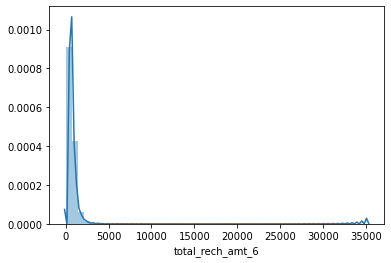

In [37]:
print(sns.distplot(data_churn.total_rech_amt_6))

AxesSubplot(0.125,0.125;0.775x0.755)


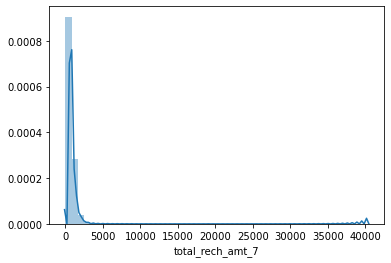

In [38]:
print(sns.distplot(data_churn.total_rech_amt_7))

AxesSubplot(0.125,0.125;0.775x0.755)


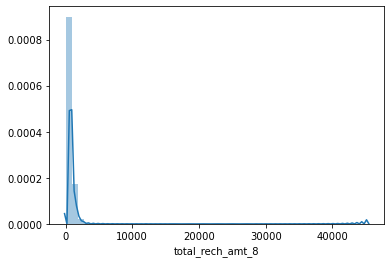

In [39]:
print(sns.distplot(data_churn.total_rech_amt_8))

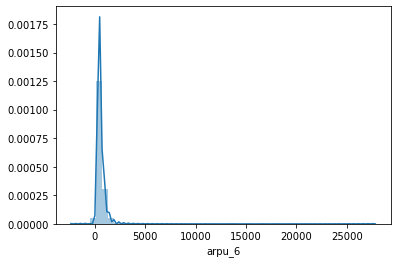

In [40]:
sns.distplot(data_churn.arpu_6)

We see that Recharge Amount is skewed towards right and arpu is skewed on both side. These have outliers so we need to treat outliers

#### total_amt vs churn

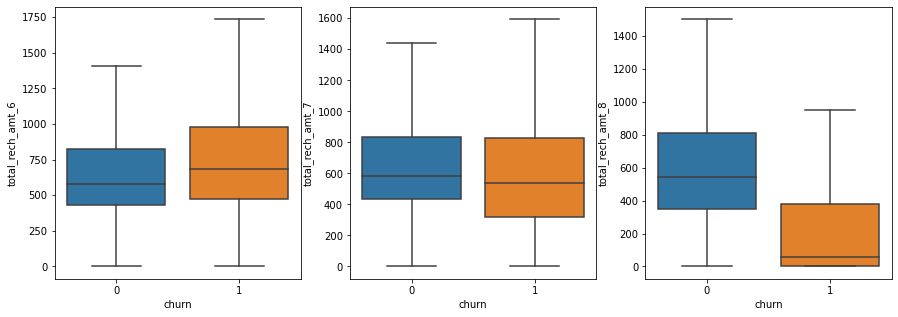

In [41]:
plt.figure(figsize = (15,5))
i = 1
for col in ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = data_churn,showfliers = False)
    i = i+1
plt.show()

In [42]:
data_churn[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','churn']].groupby('churn').median()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
churn,,,
0,577.0,586.0,544.0
1,686.0,536.0,60.0


#### Derived column: difference from consecutive months

In [44]:
data_churn[['diff_amt_6_7','diff_amt_7_8','diff_amt_6_8','churn']].groupby('churn').mean()

,diff_amt_6_7,diff_amt_7_8,diff_amt_6_8
churn,,,
0,-14.583863,54.315298,39.731435
1,170.628042,379.526458,550.154500


We can see that in case of the non churn customers the mean of the difference in recharges is negative for 6 and 7th month indicating that the recharge amount is increased in 7th month where as recharge amount reduced in 8th month which is showing differences in positive.

We can also notice that there is significant increase in number of churns.

#### Incoming calls

In [46]:
data_churn[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
count,29979.000000,29979.000000,29979.000000
mean,307.624011,314.954126,295.472794
std,361.286101,369.768358,360.411762
min,0.000000,0.000000,0.000000
25%,90.035000,98.840000,78.930000
50%,205.340000,211.240000,193.530000
75%,393.835000,396.915000,380.450000
90%,683.626000,686.280000,664.330000
95%,933.691000,942.088000,926.728000
99%,1747.174000,1807.909600,1746.503400


In [47]:
data_churn[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']].median()

total_ic_mou_6    205.34
total_ic_mou_7    211.24
total_ic_mou_8    193.53
dtype: float64

In [48]:
# more or less median seems to be very close

#### total_ic vs churn

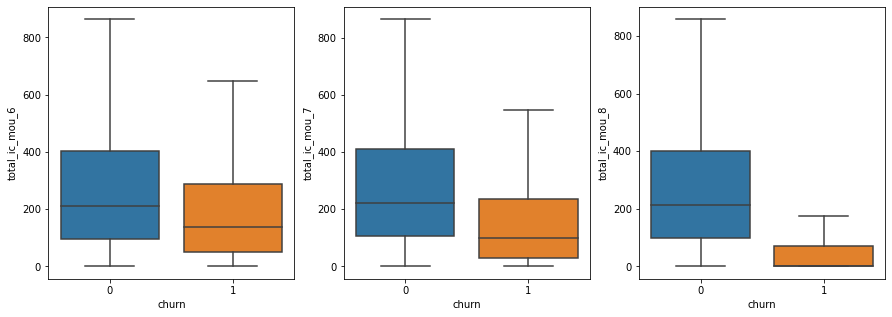

In [50]:
plt.figure(figsize = (15,5))
i = 1
for col in ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = data_churn,showfliers = False)
    i = i+1
plt.show()

In [51]:
data_churn[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn']].groupby('churn').median()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,212.23,222.315,212.36
1,137.33,100.110,0.00


We can see that the non churn customers have almost closer median through the period where as for churn customers it is almost 0 in the 8th month

Derived column: difference from consecutive months

In [52]:
data_churn[['diff_total_ic_6_7','diff_total_ic_7_8','diff_total_ic_6_8','churn']].groupby('churn').mean()

,diff_total_ic_6_7,diff_total_ic_7_8,diff_total_ic_6_8
churn,,,
0,-12.612833,9.539553,-3.073280
1,48.557733,124.659131,173.216864


We could observe that incoming calls month on month seems to be decreasing for the churn customers

#### Local incoming

In [54]:
data_churn[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8
count,29979.000000,29979.000000,29979.000000
mean,245.049942,248.553696,236.895509
std,312.307980,315.030451,305.491893
min,0.000000,0.000000,0.000000
25%,60.250000,66.440000,60.035000
50%,151.080000,154.860000,142.880000
75%,315.620000,316.785000,302.110000
90%,559.360000,559.128000,549.904000
95%,773.347000,781.397000,767.374000
99%,1485.104600,1516.842600,1460.032600


In [55]:
data_churn[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']].median()

loc_ic_mou_6    151.08
loc_ic_mou_7    154.86
loc_ic_mou_8    142.88
dtype: float64

Its almost similar median which means no major trends available

#### loc_ic vs churn

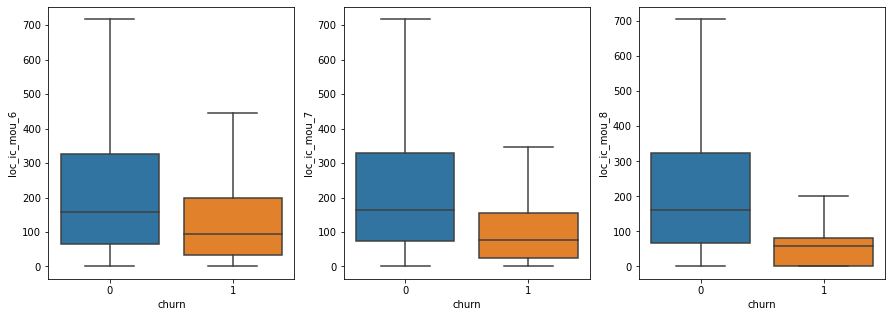

In [57]:
plt.figure(figsize = (15,5))
i = 1
for col in ['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = data_churn,showfliers = False)
    i = i+1
plt.show()

In [58]:
data_churn[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn']].groupby('churn').median()

,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8
churn,,,
0,158.335000,165.23,160.26
1,93.449289,75.51,57.53


We can see that the non churn customers have almost similar median through the period where as for churn customers median is dropping month on month and finally 0 in 8th month.

#### std incoming 

In [60]:
data_churn[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8
count,29979.000000,29979.000000,29979.000000
mean,51.043999,53.311612,47.886075
std,140.606941,149.268850,141.120003
min,-10.069830,-8.228962,-9.616636
25%,2.630000,2.785000,1.430000
50%,15.060000,16.130000,12.560000
75%,47.560000,50.390000,43.435000
90%,115.916000,118.780000,108.382000
95%,200.805000,205.345000,191.935000
99%,578.027400,617.048200,564.345000


In [61]:
data_churn[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']].median()

std_ic_mou_6    15.06
std_ic_mou_7    16.13
std_ic_mou_8    12.56
dtype: float64

In [62]:
# no major deviation

#### std_ic Vs churn

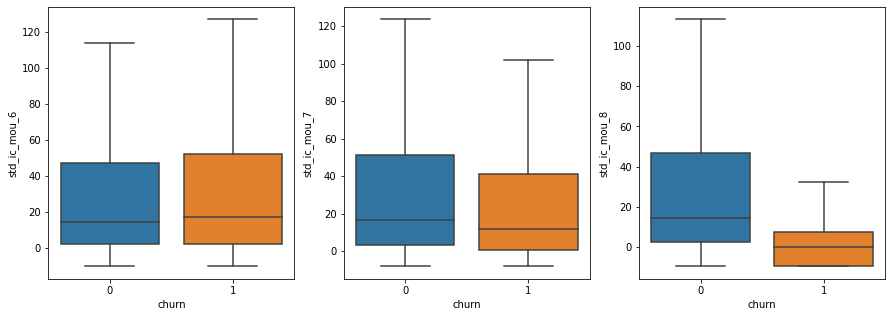

In [64]:
plt.figure(figsize = (15,5))
i = 1
for col in ['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = data_churn,showfliers = False)
    i = i+1
plt.show()

In [65]:
data_churn[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn']].groupby('churn').median()

,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8
churn,,,
0,14.79,16.51,14.42
1,17.46,11.76,0.00


We can see that the non churn customers have almost similar median through the period where as for churn customers it is almost 0 in the 8th month

#### roam incoming

In [67]:
data_churn[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8
count,29979.000000,29979.000000,29979.000000
mean,17.849131,13.749267,14.263975
std,79.239978,76.402703,74.997045
min,-60.767381,-46.842837,-315.326234
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
90%,36.408000,20.044000,27.421388
95%,94.933000,63.780000,64.683000
99%,349.546000,293.541000,290.463600


In [68]:
data_churn[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']].mean()

roam_ic_mou_6    17.849131
roam_ic_mou_7    13.749267
roam_ic_mou_8    14.263975
dtype: float64

#### roam_og Vs churn

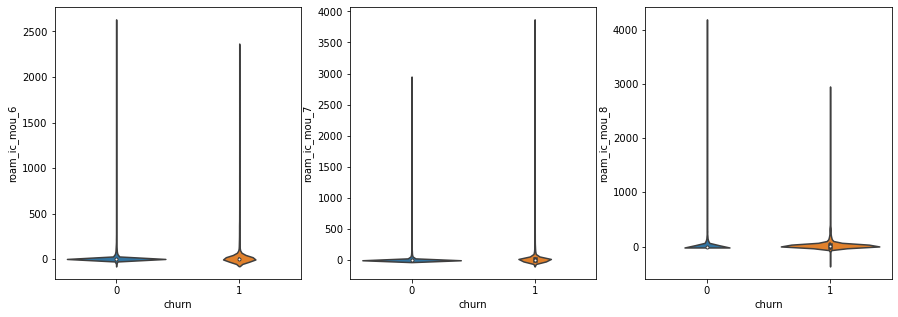

In [70]:
plt.figure(figsize = (15,5))
i = 1
for col in ['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']:
    plt.subplot(1,3,i)
    sns.violinplot(x = 'churn',y = col,data = data_churn,showfliers = False)
    i = i+1
plt.show()

In [71]:
data_churn[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn']].groupby('churn').mean()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8
churn,,,
0,16.459382,12.036424,12.116738
1,32.551807,31.870072,36.980398


The customers who have churned have higher roaming incoming calls than the non churned customers

#### Total_outgoing calls


In [73]:
data_churn[['total_og_mou_6','total_og_mou_7','total_og_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,total_og_mou_6,total_og_mou_7,total_og_mou_8
count,29979.000000,29979.000000,29979.000000
mean,687.068925,709.531995,624.107691
std,660.557039,685.283264,686.211375
min,0.000000,0.000000,0.000000
25%,266.480000,275.275000,188.965000
50%,510.760000,526.130000,435.810000
75%,899.960000,931.305000,833.435000
90%,1459.550000,1495.450000,1395.410000
95%,1921.535000,1958.050000,1883.308000
99%,3218.112600,3287.774200,3252.238600


In [74]:
data_churn[['total_og_mou_6','total_og_mou_7','total_og_mou_8']].median()

total_og_mou_6    510.76
total_og_mou_7    526.13
total_og_mou_8    435.81
dtype: float64

looks like there is sharp decline in total outgoing on 8th month compared to other 2 months

#### total_og vs churn


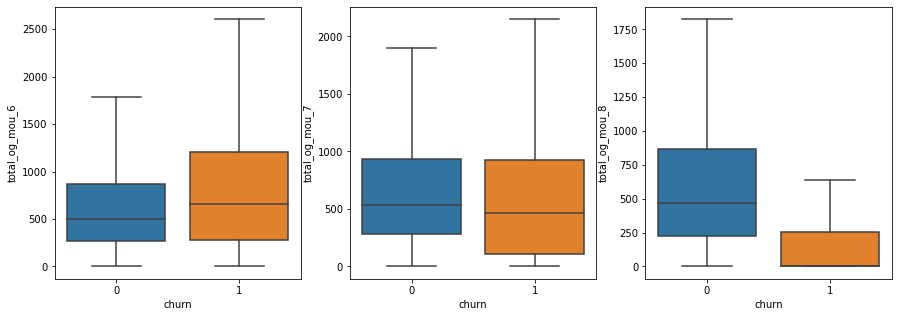

In [76]:
plt.figure(figsize = (15,5))
i = 1
for col in ['total_og_mou_6','total_og_mou_7','total_og_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = data_churn,showfliers = False)
    i = i+1
plt.show()

In [77]:
data_churn[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']].groupby('churn').median()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,501.10,530.385,471.14
1,658.79,466.910,0.00


We can see that for churn customers total out going kept reducing month on month and 0 in 8th month. Where as for non curn customer there is a mixed trend.

In [78]:
# Derived column analysis

In [79]:
data_churn[['diff_total_og_6_7','diff_total_og_7_8','diff_total_og_6_8','churn']].groupby('churn').mean()

,diff_total_og_6_7,diff_total_og_7_8,diff_total_og_6_8
churn,,,
0,-42.580943,50.688322,8.107379
1,190.371433,452.909258,643.280691



For churn cutomers outgoing calls is high. 

### Local outgoing 

In [80]:
data_churn[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8
count,29979.000000,29979.000000,29979.000000
mean,282.731529,283.493575,259.914283
std,380.396495,376.611185,367.735765
min,-31.073371,-71.900656,-44.644475
25%,51.010000,56.710000,38.280000
50%,166.330000,170.460000,148.280000
75%,374.600000,376.035000,348.340000
90%,662.456000,658.094000,633.510000
95%,936.305000,920.378000,883.277000
99%,1808.491000,1761.771600,1689.533800


In [81]:
data_churn[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']].median()

loc_og_mou_6    166.33
loc_og_mou_7    170.46
loc_og_mou_8    148.28
dtype: float64

### in the intial two months the og calls are almost same where as there is a slight dip in the final month

loc_og vs churn

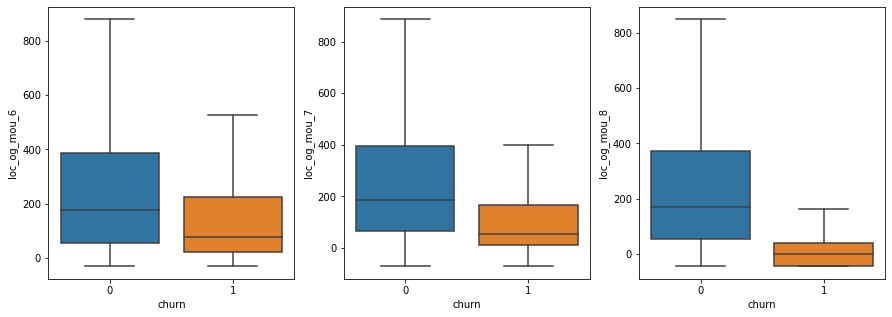

In [82]:
plt.figure(figsize = (15,5))
i = 1
for col in ['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = data_churn,showfliers = False)
    i = i+1
plt.show()

In [83]:
data_churn[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn']].groupby('churn').median()

,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8
churn,,,
0,176.91,185.87,168.885
1,75.68,55.78,0.000


In [84]:
# We can see that for chrun customer the median is reducing month on month and for 8th month its zero

#### std_og Vs churn

In [86]:
data_churn[['std_og_mou_6','std_og_mou_7','std_og_mou_8']].median()

std_og_mou_6    137.04
std_og_mou_7    145.39
std_og_mou_8     98.76
dtype: float64

The std og calls are almost same in the first two months where as there is a sharp decrease in the 8th month

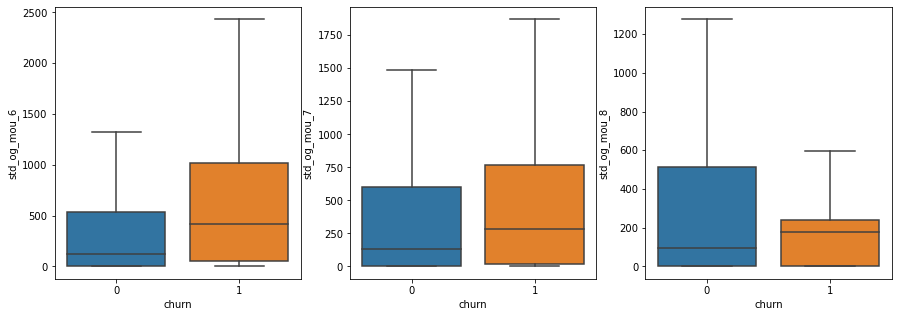

In [87]:
plt.figure(figsize = (15,5))
i = 1
for col in ['std_og_mou_6','std_og_mou_7','std_og_mou_8']:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'churn',y = col,data = data_churn,showfliers = False)
    i = i+1
plt.show()

In [88]:
data_churn[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn']].groupby('churn').median()

,std_og_mou_6,std_og_mou_7,std_og_mou_8
churn,,,
0,119.47,130.135000,94.28
1,421.33,281.074617,178.59


For churn customers the std out going kept reducing month on month and 0 for 8th month

#### roam outgoing vs chrun

In [90]:
data_churn[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
count,29979.000000,29979.000000,29979.000000
mean,29.734534,22.136948,23.131680
std,118.595603,97.965304,106.367966
min,0.000000,-90.313688,-81.029010
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
90%,64.744000,41.314000,52.456082
95%,168.647000,119.447000,114.995000
99%,544.085400,448.174000,432.999600


In [91]:
data_churn[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']].mean()

roam_og_mou_6    29.734534
roam_og_mou_7    22.136948
roam_og_mou_8    23.131680
dtype: float64

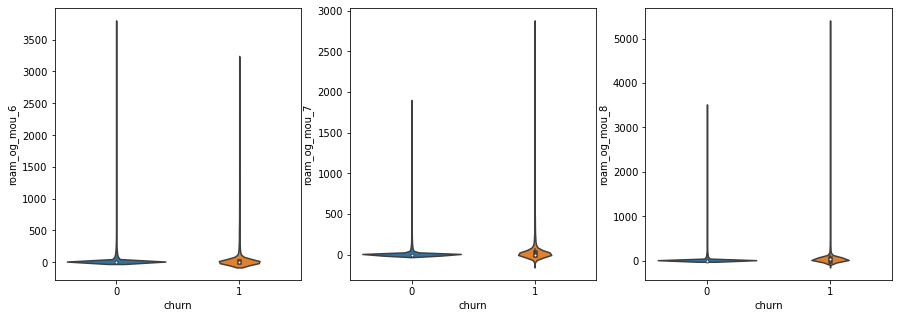

In [92]:
plt.figure(figsize = (15,5))
i = 1
for col in ['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']:
    plt.subplot(1,3,i)
    sns.violinplot(x = 'churn',y = col,data = data_churn,showfliers = False)
    i = i+1
plt.show()

In [93]:
data_churn[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','churn']].groupby('churn').mean()

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
churn,,,
0,27.224759,19.291543,19.505625
1,56.286377,52.239556,61.493072


There is sligh decrease in roaming out going month on month for churn customers

#### AON

In [95]:
data_churn[['aon']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,aon
count,29979.000000
mean,1264.158911
std,975.181038
min,180.000000
25%,480.000000
50%,914.000000
75%,1923.500000
90%,2846.000000
95%,3178.200000
99%,3651.000000


#### Aon Vs churn

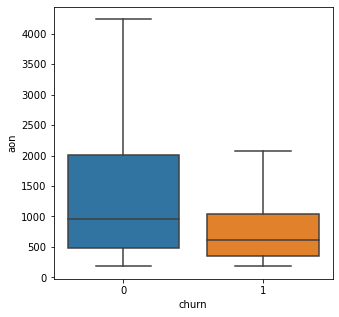

In [97]:
plt.figure(figsize = (5,5))
sns.boxplot(x = 'churn',y = 'aon',data = data_churn,showfliers = False)
plt.show()

In [98]:
data_churn[['aon','churn']].groupby('churn').median()

,aon
churn,
0,958.0
1,616.0


 The median on age on network of people who chrun is lesser than that of the non churn customers.

arpu Vs churn

In [100]:
data_churn[['arpu_6','arpu_7','arpu_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,arpu_6,arpu_7,arpu_8
count,29979.000000,29979.000000,29979.000000
mean,587.587624,589.424681,535.067748
std,442.848876,463.049067,492.447887
min,-2258.709000,-2014.045000,-945.808000
25%,364.352500,365.235000,289.782000
50%,495.951000,493.781000,452.232000
75%,704.184500,700.986000,671.349500
90%,994.311800,996.051400,985.499200
95%,1240.976700,1261.848400,1258.703300
99%,1983.590100,1999.509680,1988.082260


In [101]:
data_churn[['arpu_6','arpu_7','arpu_8']].mean()

arpu_6    587.587624
arpu_7    589.424681
arpu_8    535.067748
dtype: float64

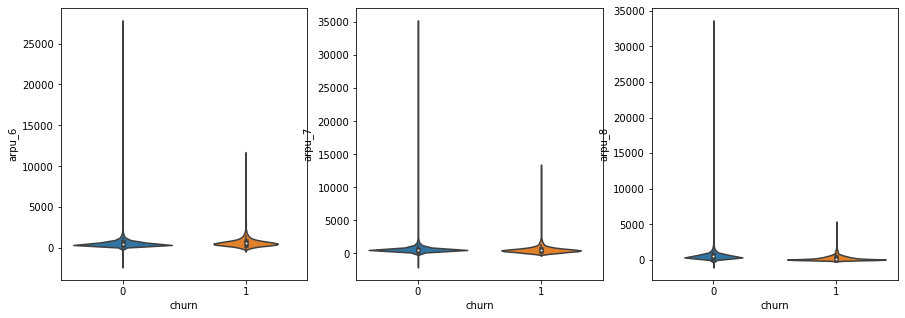

In [102]:
plt.figure(figsize = (15,5))
i = 1
for col in ['arpu_6','arpu_7','arpu_8']:
    plt.subplot(1,3,i)
    sns.violinplot(x = 'churn',y = col,data = data_churn,showfliers = False)
    i = i+1
plt.show()

In [103]:
data_churn[['arpu_6','arpu_7','arpu_8','churn']].groupby('churn').mean()

,arpu_6,arpu_7,arpu_8
churn,,,
0,578.923405,593.068613,562.660367
1,679.249638,550.874162,243.155099


The customers who have churned have large revenue in the 6th month, but as with the progession their revenue have also decreased.

#### Onnet v churn

In [105]:
data_churn[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,onnet_mou_6,onnet_mou_7,onnet_mou_8
count,29979.000000,29979.000000,29979.000000
mean,293.586794,302.189753,261.513270
std,463.353706,484.075874,471.672212
min,-301.469667,-720.579928,-875.004659
25%,41.170000,41.045000,27.070000
50%,125.890000,125.560000,99.590000
75%,353.500000,360.360000,298.215000
90%,795.354000,825.486000,724.182000
95%,1154.900000,1208.691000,1115.857000
99%,2166.876000,2220.577600,2189.445800


In [106]:
data_churn[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].mean()

onnet_mou_6    293.586794
onnet_mou_7    302.189753
onnet_mou_8    261.513270
dtype: float64

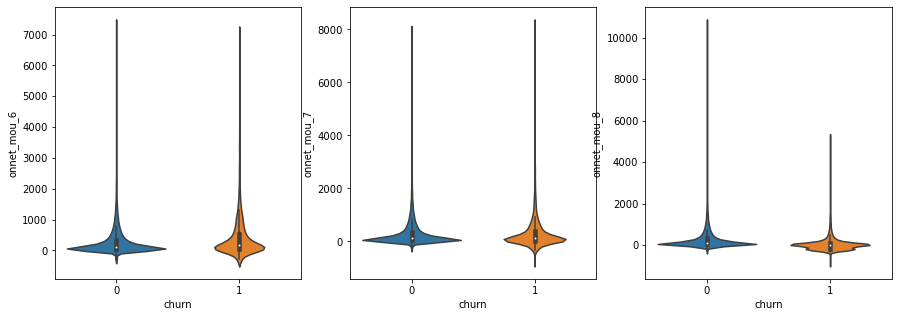

In [107]:
plt.figure(figsize = (15,5))
i = 1
for col in ['onnet_mou_6','onnet_mou_7','onnet_mou_8']:
    plt.subplot(1,3,i)
    sns.violinplot(x = 'churn',y = col,data = data_churn,showfliers = False)
    i = i+1
plt.show()

In [108]:
data_churn[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']].groupby('churn').mean()

,onnet_mou_6,onnet_mou_7,onnet_mou_8
churn,,,
0,283.742572,302.292562,280.238492
1,397.732504,301.102103,63.412141


The customers who have churned have onnet reducing month on month

#### Offnet vs churn

In [110]:
data_churn[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

,offnet_mou_6,offnet_mou_7,offnet_mou_8
count,29979.000000,29979.000000,29979.000000
mean,421.585789,427.384234,383.613652
std,468.891081,484.934782,473.320877
min,0.000000,0.000000,-72.028285
25%,142.860000,141.280000,111.770000
50%,289.610000,289.080000,261.160000
75%,523.625000,532.905000,483.000000
90%,916.490000,935.716000,854.006000
95%,1271.757000,1287.221000,1188.523000
99%,2328.192600,2411.004400,2212.303000


In [111]:
data_churn[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].mean()

offnet_mou_6    421.585789
offnet_mou_7    427.384234
offnet_mou_8    383.613652
dtype: float64

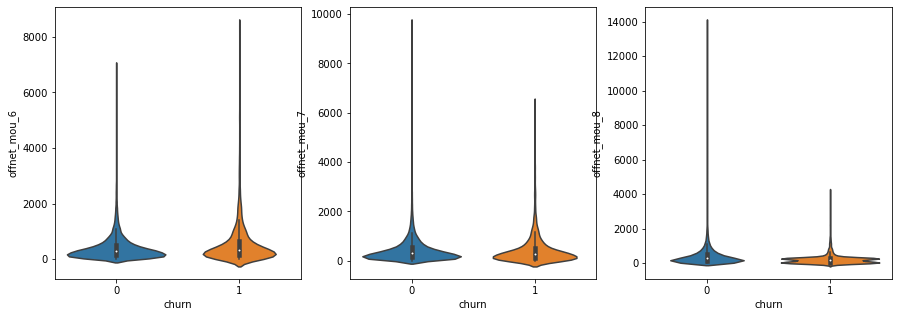

In [112]:
plt.figure(figsize = (15,5))
i = 1
for col in ['offnet_mou_6','offnet_mou_7','offnet_mou_8']:
    plt.subplot(1,3,i)
    sns.violinplot(x = 'churn',y = col,data = data_churn,showfliers = False)
    i = i+1
plt.show()

In [113]:
data_churn[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn']].groupby('churn').mean()

,offnet_mou_6,offnet_mou_7,offnet_mou_8
churn,,,
0,411.775141,427.141657,398.485466
1,525.376308,429.950544,226.279167


The customers who have churned has a decreasing offnet month on month

## Bi-Variate Analysis

In [114]:
ic_cols = [col for col in data_churn.columns if '_ic' in col]
ic_cols.append('churn')

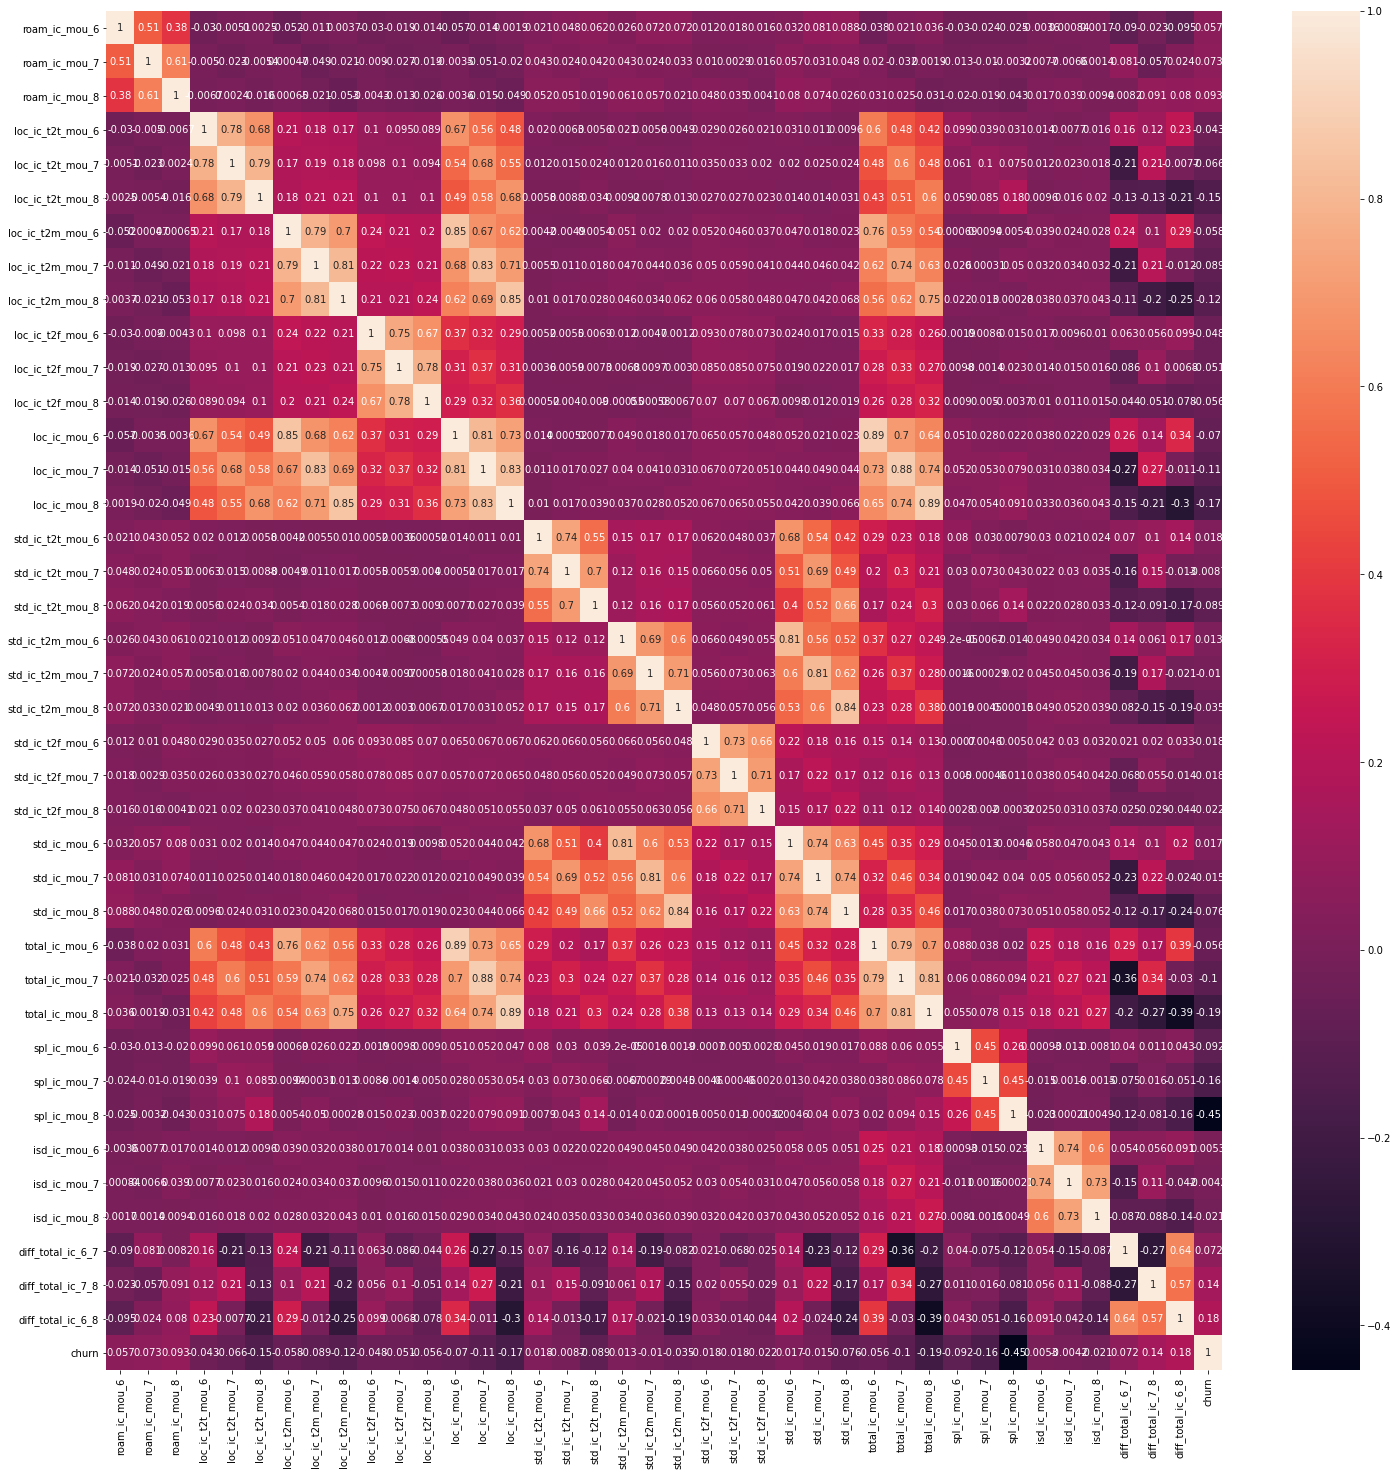

In [115]:
plt.figure(figsize = (25,25))
sns.heatmap(data_churn[ic_cols].corr(),annot = True)
plt.show()

In [116]:
data_churn[ic_cols].corr()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,diff_total_ic_6_7,diff_total_ic_7_8,diff_total_ic_6_8,churn
roam_ic_mou_6,1.000000,0.507390,0.379338,-0.030387,-0.005115,0.002549,-0.051818,-0.011388,0.003738,-0.030459,-0.019105,-0.014112,-0.056720,-0.013643,0.001933,0.020984,0.047585,0.061713,0.025724,0.072177,0.072242,0.011789,0.018382,0.016458,0.031973,0.080758,0.088202,-0.038322,0.020784,0.035682,-0.029612,-0.024366,-0.024745,-0.003568,0.000843,0.001730,-0.090202,-0.023109,-0.095423,0.057047
roam_ic_mou_7,0.507390,1.000000,0.613432,-0.004954,-0.023491,-0.005373,0.000473,-0.048976,-0.020741,-0.008952,-0.026666,-0.018570,-0.003506,-0.050754,-0.020048,0.042510,0.023659,0.042232,0.043370,0.024316,0.032622,0.010148,0.002918,0.015530,0.056540,0.031097,0.048437,0.020124,-0.032408,0.001865,-0.012727,-0.010065,-0.003222,0.007688,-0.006596,0.001376,0.080664,-0.056515,0.023577,0.072920
roam_ic_mou_8,0.379338,0.613432,1.000000,-0.006678,0.002432,-0.015601,0.000647,-0.021077,-0.052708,-0.004251,-0.012548,-0.025634,-0.003572,-0.015321,-0.048870,0.051710,0.050886,0.018727,0.060722,0.057396,0.020616,0.047768,0.035187,0.004081,0.079526,0.074471,0.025660,0.030675,0.024701,-0.031463,-0.020411,-0.018780,-0.042672,0.016675,0.038788,0.009351,0.008164,0.091426,0.080117,0.093126
loc_ic_t2t_mou_6,-0.030387,-0.004954,-0.006678,1.000000,0.781670,0.676485,0.207524,0.181266,0.173781,0.104418,0.094922,0.088875,0.672614,0.557857,0.484607,0.020363,0.006282,0.005583,0.020877,0.005555,0.004851,0.029109,0.025754,0.021409,0.030596,0.011052,0.009586,0.599656,0.482918,0.419795,0.098538,0.039118,0.031339,0.014491,0.007677,0.016193,0.159534,0.121770,0.233500,-0.043275
loc_ic_t2t_mou_7,-0.005115,-0.023491,0.002432,0.781670,1.000000,0.791218,0.174840,0.190667,0.182301,0.097698,0.099855,0.094323,0.537073,0.681635,0.550655,0.011531,0.015109,0.024145,0.011766,0.016477,0.011057,0.034553,0.032673,0.020119,0.019847,0.024768,0.023648,0.476630,0.598713,0.483784,0.061154,0.099713,0.075417,0.012292,0.022680,0.018414,-0.206061,0.209991,-0.007724,-0.066111
loc_ic_t2t_mou_8,0.002549,-0.005373,-0.015601,0.676485,0.791218,1.000000,0.184128,0.208012,0.211071,0.099844,0.100456,0.101670,0.490319,0.582405,0.679828,0.005762,0.008838,0.034495,0.009231,0.007846,0.013202,0.027225,0.027386,0.022768,0.013739,0.014356,0.030994,0.433170,0.508564,0.600913,0.058731,0.085432,0.176475,0.009597,0.015610,0.019617,-0.132188,-0.127383,-0.214667,-0.146149
loc_ic_t2m_mou_6,-0.051818,0.000473,0.000647,0.207524,0.174840,0.184128,1.000000,0.787916,0.701194,0.238046,0.211413,0.204484,0.849965,0.673985,0.618499,0.004208,-0.004916,0.005368,0.051345,0.020357,0.019584,0.051646,0.045799,0.036965,0.046602,0.017925,0.022691,0.761613,0.587633,0.540491,0.000691,0.009395,0.005409,0.039253,0.023567,0.027807,0.242455,0.100425,0.287142,-0.058237
loc_ic_t2m_mou_7,-0.011388,-0.048976,-0.021077,0.181266,0.190667,0.208012,0.787916,1.000000,0.809436,0.218263,0.228150,0.207646,0.683263,0.832432,0.707572,0.005534,0.011471,0.018332,0.047187,0.044080,0.035765,0.050409,0.059023,0.041189,0.044183,0.045881,0.042080,0.615675,0.736008,0.626236,0.025875,0.000308,0.050203,0.031847,0.033966,0.031780,-0.208290,0.207425,-0.011677,-0.089451
loc_ic_t2m_mou_8,0.003738,-0.020741,-0.052708,0.173781,0.182301,0.211071,0.701194,0.809436,1.000000,0.205530,0.205292,0.235351,0.616076,0.691959,0.847411,0.010104,0.017246,0.027666,0.045951,0.034088,0.062136,0.060310,0.058303,0.047970,0.047270,0.041988,0.067549,0.559383,0.615329,0.754938,0.021875,0.012735,0.00

We can see higher correlation among different months.

Correlation with Churn variable

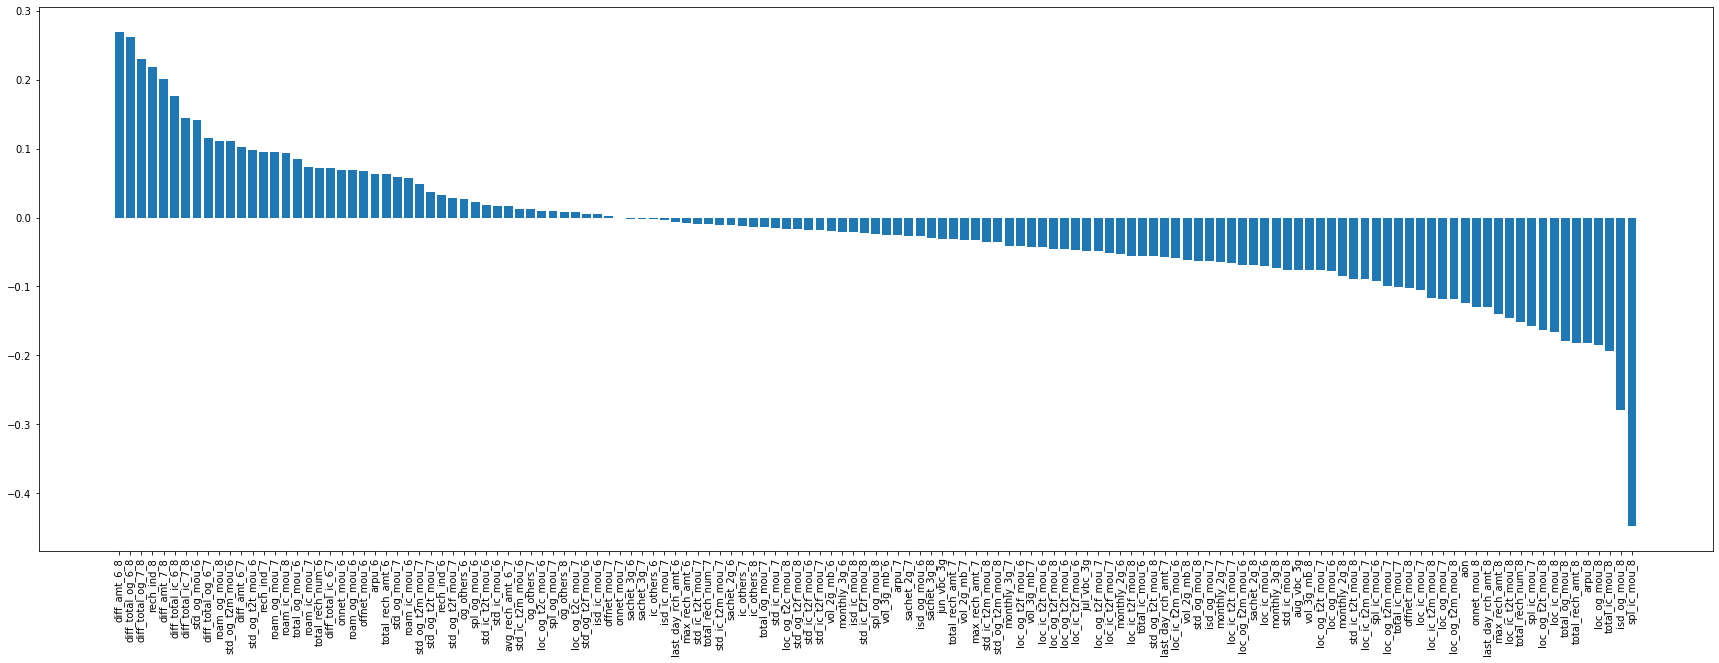

In [117]:
corr = data_churn.corr()['churn'].sort_values(ascending = False)[1:]
plt.figure(figsize = (30,10))
plt.bar(range(len(corr)),corr)
plt.xticks(range(len(corr)),corr.index,rotation = 'vertical')
plt.show()

We can see that the drop of og calls and not recharging the mobiles in the 8th seems to signify that the customer is going to churn. We can also see that the std and roam variables are also contributing to the churn positively where as max rech and total calls seems to effect the churn negatively.

### Outlier Treatment

#### Cap outliers in all numeric variables with k-sigma technique

In [118]:
out_col = data_churn.columns.drop(['churn'])

In [119]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [120]:
# cap outliers in the numeric columns
data_churn[out_col] = data_churn[out_col].apply(cap_outliers, axis=0)

In [121]:
data_churn.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,rech_ind_6,rech_ind_7,rech_ind_8,churn,diff_amt_6_7,diff_amt_7_8,diff_amt_6_8,diff_total_ic_6_7,diff_total_ic_7_8,diff_total_ic_6_8,diff_total_og_6_7,diff_total_og_7_8,diff_total_og_6_8
0,1069.180,1349.850,2012.411408,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.940000,626.46,558.04,428.74,0.21,0.0,0.0,2.060000,14.53,31.590000,15.740000,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,2420.051436,695.758778,720.543733,680.943675,0.0,0.0,531.63749,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1185.0,0.0,0.0,0.0,1,790.0,-1284.235461,-1512.087409,68.420000,129.300000,197.72,-121.71,259.08,137.37
1,378.721,492.223,137.362000,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.750000,103.86,28.49,16.54,0.00,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.000000,90.000000,154.000000,30.000000,50.0,0.0,10.00000,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,519.0,0.0,0.0,0.0,0,-164.0,481.000000,317.000000,75.370000,11.950000,87.32,76.70,260.10,336.80
2,492.846,205.671,593.260000,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.8

## Modelling

In [122]:

# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.svm import SVC

In [123]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data_churn.drop(['churn'],axis=1)

# Putting response variable to y
y = data_churn['churn']

In [124]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100,stratify = y)

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [126]:
X_train[out_col] = scaler.fit_transform(X_train[out_col])


In [127]:
X_test[out_col] =scaler.transform(X_test[out_col])

### Handling class imbalance.

Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class

### Informed Over Sampling: Synthetic Minority Over-sampling Technique(SMOTE)

In [128]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1812
Before OverSampling, counts of label '0': 19173 

Before OverSampling, churn event rate : 8.63% 



In [129]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, sampling_strategy=1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [130]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (38346, 137)
After OverSampling, the shape of train_y: (38346,) 

After OverSampling, counts of label '1': 19173
After OverSampling, counts of label '0': 19173
After OverSampling, churn event rate : 50.0% 



### PCA

In [131]:
pca = PCA(svd_solver='randomized', random_state=42)

In [132]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

In [133]:
pca.explained_variance_ratio_[:50]

array([0.13069463, 0.08692514, 0.07282352, 0.06148082, 0.04161148,
       0.03776505, 0.03349638, 0.03233993, 0.03085424, 0.03077667,
       0.02455279, 0.02212105, 0.02122364, 0.01622169, 0.01495407,
       0.01427012, 0.01415698, 0.0139827 , 0.01317319, 0.01268161,
       0.01203568, 0.01155977, 0.01097173, 0.01001126, 0.00948918,
       0.00907531, 0.00875412, 0.00795225, 0.00749569, 0.00739873,
       0.00713842, 0.00631883, 0.00623634, 0.00607187, 0.0058376 ,
       0.00560269, 0.00539355, 0.00528119, 0.0049891 , 0.00480803,
       0.00476125, 0.00444608, 0.00431845, 0.00405491, 0.00373979,
       0.00365934, 0.00357662, 0.00347534, 0.00334343, 0.00327113])

In [134]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       13.07
1       21.76
2       29.04
3       35.19
4       39.35
5       43.13
6       46.48
7       49.71
8       52.80
9       55.88
10      58.33
11      60.54
12      62.67
13      64.29
14      65.78
15      67.21
16      68.63
17      70.03
18      71.34
19      72.61
20      73.81
21      74.97
22      76.07
23      77.07
24      78.02
25      78.92
26      79.80
27      80.60
28      81.35
29      82.08
30      82.80
31      83.43
32      84.05
33      84.66
34      85.25
35      85.81
36      86.34
37      86.87
38      87.37
39      87.85
40      88.33
41      88.77
42      89.21
43      89.61
44      89.98
45      90.35
46      90.71
47      91.06
48      91.39
49      91.72
50      92.02
51      92.31
52      92.60
53      92.87
54      93.13
55      93.39
56      93.63
57      93.87
58      94.11
59      94.33
60      94.56
61      94.78
62      95.00
63      95.22
64      95.42
65      95.61
66      95.80
67      95.98
68      96.16
69      96.33
70      96.50
71    

Around 45 features explain 90% of variance
Around 63 features explain 95% of variance

<BarContainer object of 137 artists>

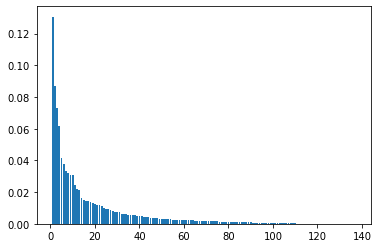

In [135]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

#### Making the scree plot

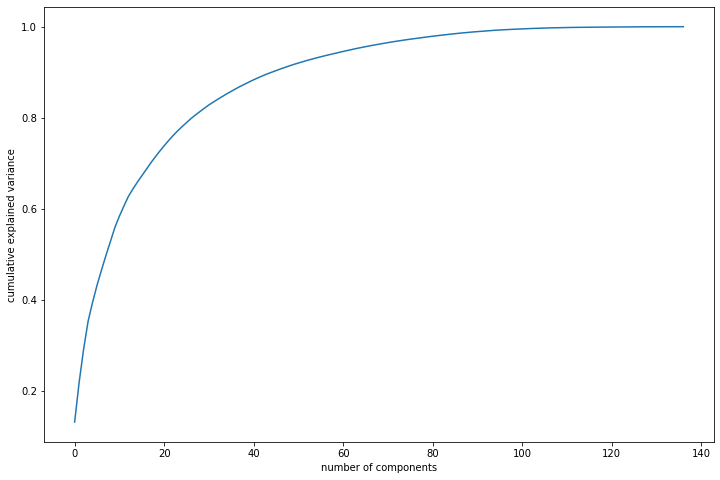

In [136]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [137]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=45)

In [138]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38346, 45)

In [139]:

#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0


max corr: 0.040910425819962605 , min corr:  -0.05856558460590604


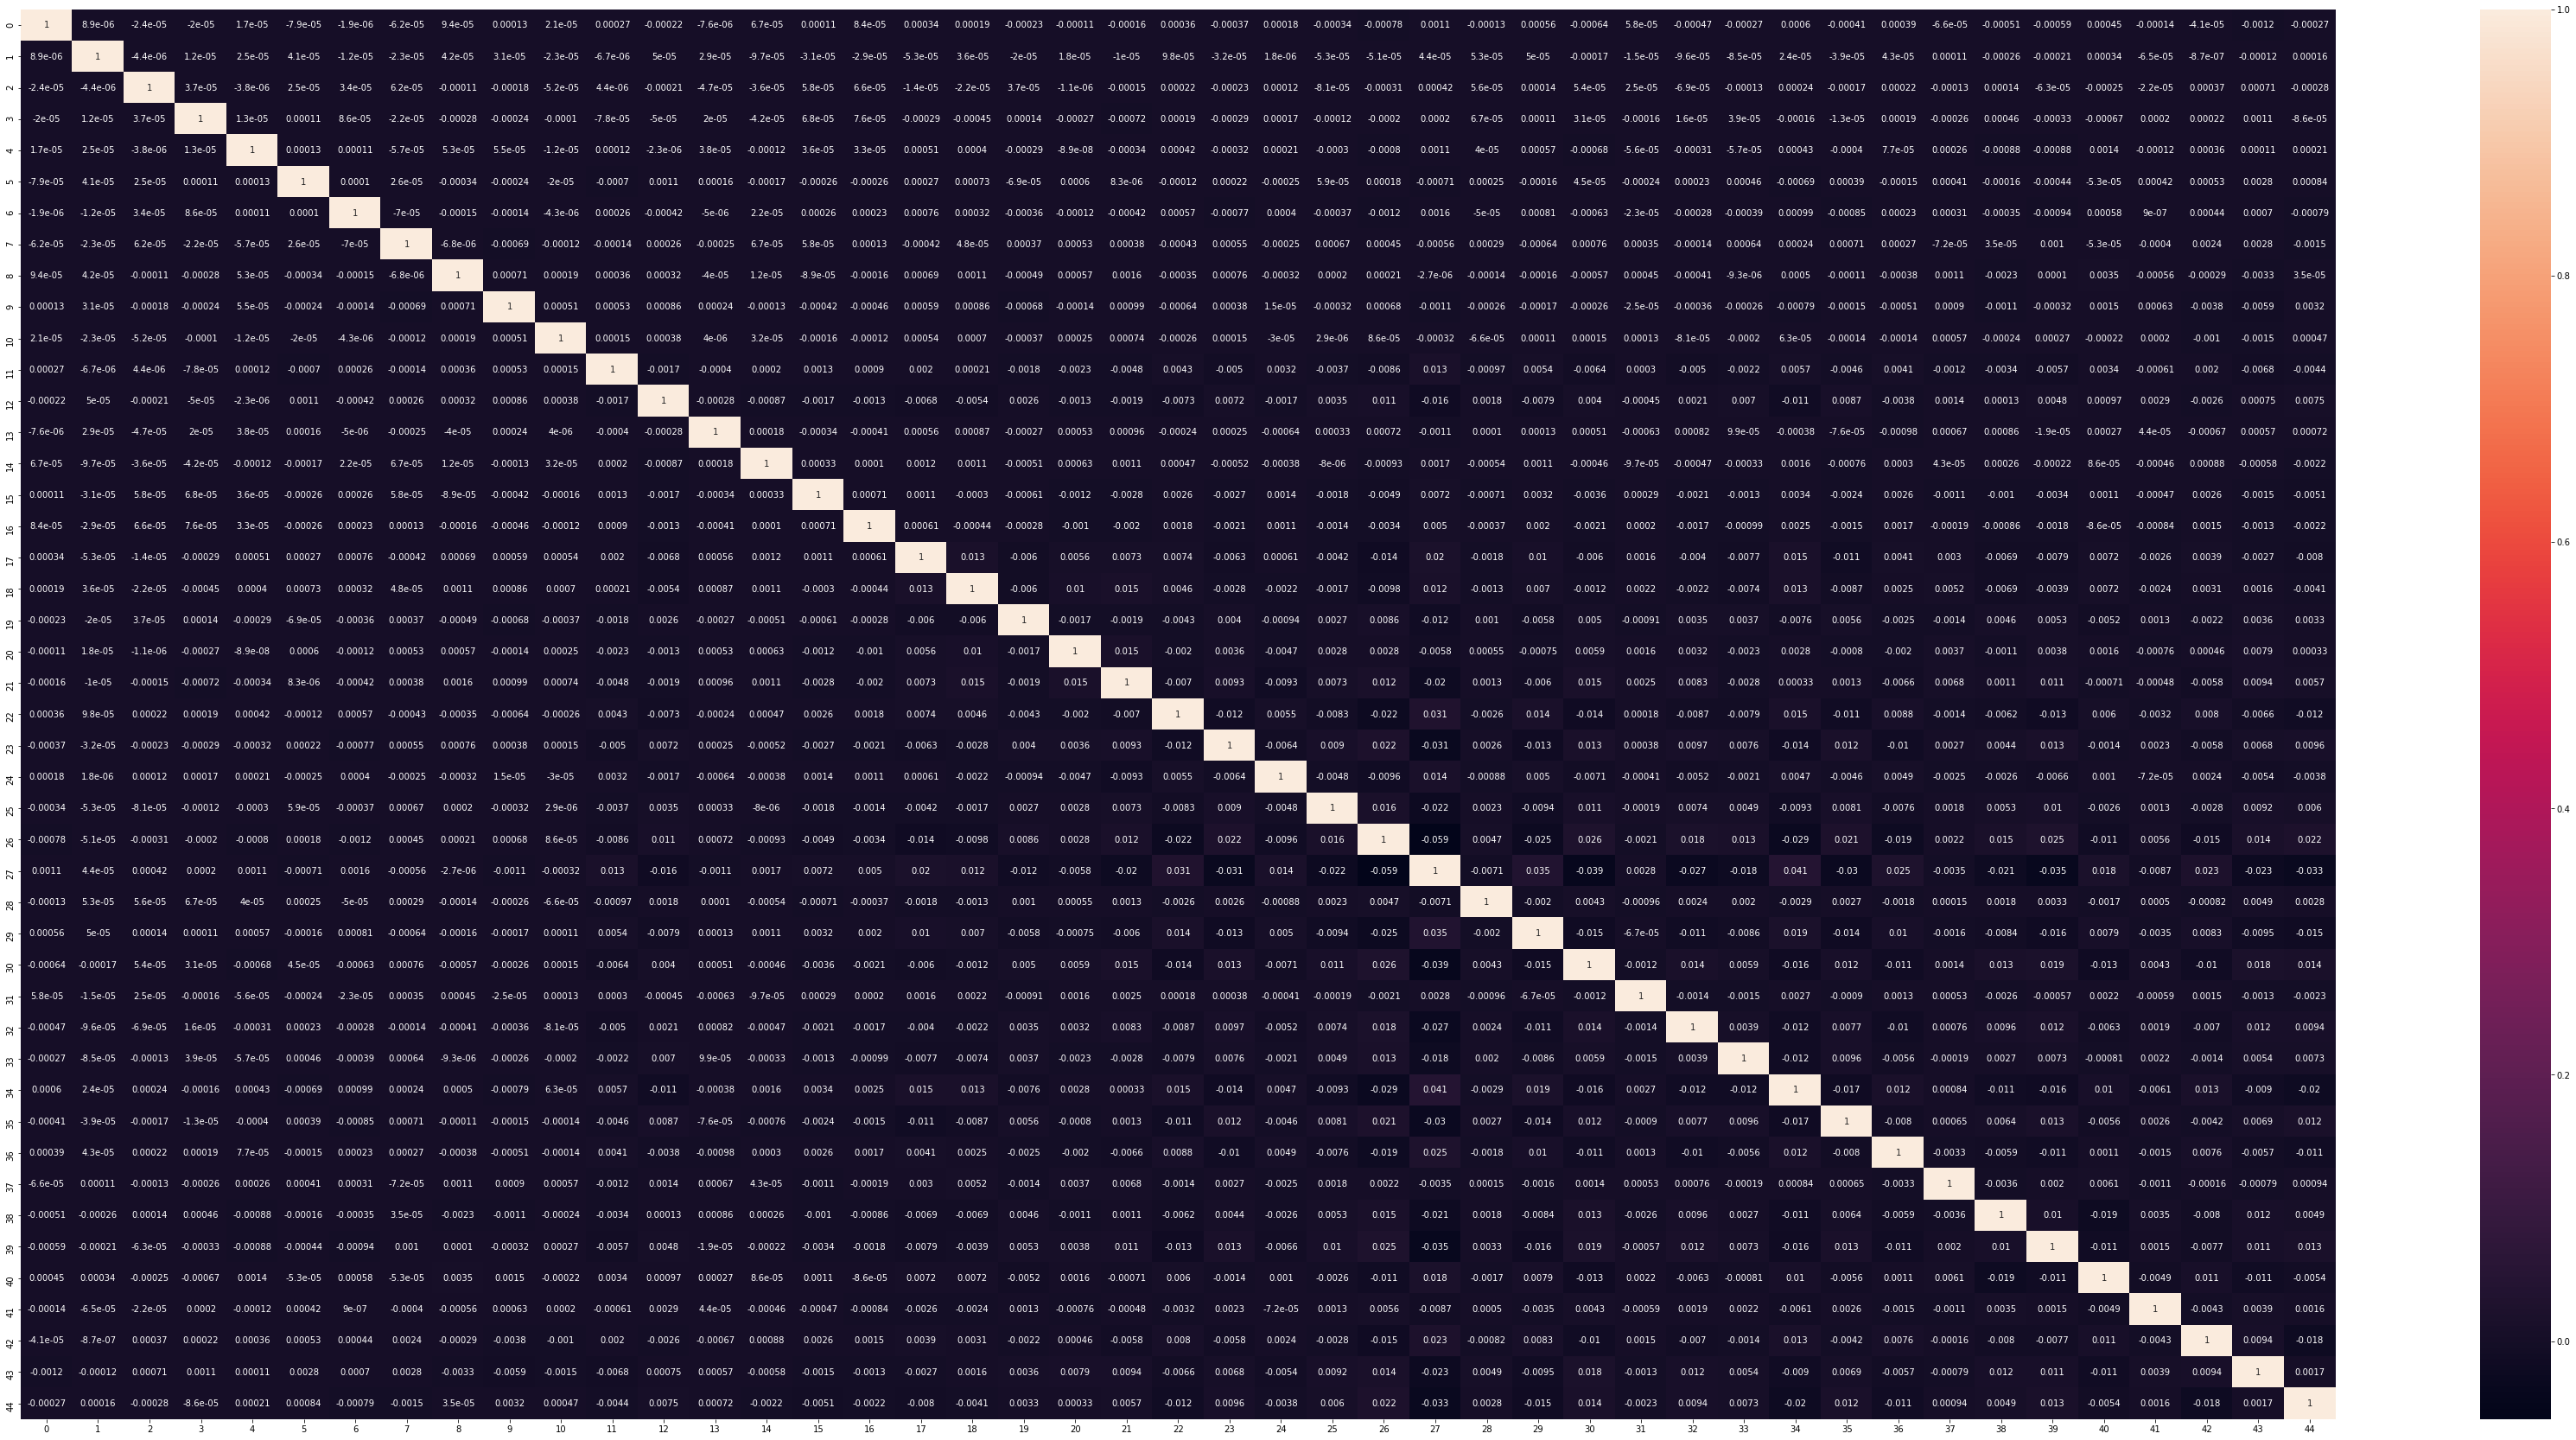

In [140]:
plt.figure(figsize = (60,30))
sns.heatmap(corrmat,annot = True)

There is no Correlation between the features now

In [141]:
#Applying selected components to the test data - 45 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8994, 45)

For the prediction of churn customers we will be fitting variety of models and select one which is the best predictor of churn. Models trained are,

1. Logistic Regression
2. Decision Tree
3. Random Forest

## PCA and Logistic Regression

In [142]:
def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [143]:

def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [144]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [145]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [146]:
# create pipeline
lr0 = LogisticRegression(class_weight='balanced')

In [148]:
# fit model
import sklearn.metrics as metrics
lr0.fit(X_train_pca, y_train_res)
        
#Predict training set:
dtrain_predictions = lr0.predict(X_train_pca)
dtrain_predprob = lr0.predict_proba(X_train_pca)[:,1]
 

    
#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train_res, dtrain_predictions))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train_res, dtrain_predictions))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train_res, dtrain_predprob))


Model Report
Accuracy : 0.849
Recall/Sensitivity : 0.8472
AUC Score (Train): 0.916084


### Evaluate on test data

In [149]:
# predict churn on test data
y_pred= lr0.predict(X_test_pca)

getModelMetrics(y_test,y_pred)

#create onfusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# # check sensitivity and specificity
# sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
# print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# # check area under curve
# y_pred_prob = lr0.predict_proba(X_test_pca)[:, 1]
# print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Roc_auc_score : 0.8167519733784794
Sensitivity/Recall : 0.7863577863577863
Specificity: 0.8471461603991725
False Positive Rate: 0.15285383960082755
Positive predictive value: 0.32726298875200854
Negative Predictive value: 0.9767082924091484
sklearn precision score value: 0.32726298875200854


### Hyperparameter tuning - PCA and Logistic Regression

In [150]:

# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [45, 50, 60], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_logistic = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [151]:

# fit model
model_logistic.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   58.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [45, 50, 60]},
             scoring='roc_auc', verbose=1)

In [152]:
# cross validation results
pd.DataFrame(model_logistic.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.517591,0.101750,0.000000,0.000000,0.1,l1,45,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,48
1,1.696926,0.135424,0.000000,0.000000,0.1,l1,50,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
2,1.964185,0.142556,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,36
3,1.919814,0.092742,0.040857,0.003256,0.1,l2,45,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.918678,0.912075,0.913402,0.913911,0.917047,0.915023,0.002450,17
4,1.945045,0.078719,0.042272,0.006083,0.1,l2,50,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.919159,0.913499,0.914407,0.915927,0.919024,0.916403,0.002328,10
5,2.439865,0.167582,0.045955,0.004113,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.921163,0.914668,0.915995,0.917000,0.919816,0.917728,0.002410,2
6,1.580834,0.097841,0.000000,0.000000,0.5,l1,45,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
7,1.616151,0.105839,0.000000,0.000000,0.5,l1,50,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,46
8,1.955551,0.083944,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,45
9,1.863653,0.065389,0.038421,0.006947,0.5,l2,45,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.917627,0.911807,0.913220,0.913938,0.917145,0.914747,0.002266,24


In [153]:
# print best hyperparameters
print("Best AUC: ", model_logistic.best_score_)
print("Best hyperparameters: ", model_logistic.best_params_)

Best AUC:  0.9177796692643444
Best hyperparameters:  {'logistic__C': 2, 'logistic__penalty': 'l2', 'pca__n_components': 60}


In [154]:
# predict churn on test data
y_pred = model_logistic.predict(X_test)

getModelMetrics(y_test,y_pred)
# # create onfusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# # check sensitivity and specificity
# sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
# print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# # check area under curve
# y_pred_prob = model_logistic.predict_proba(X_test)[:, 1]
# print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Roc_auc_score : 0.8219683460647317
Sensitivity/Recall : 0.7902187902187903
Specificity: 0.853717901910673
False Positive Rate: 0.14628209808932702
Positive predictive value: 0.3381057268722467
Negative Predictive value: 0.9772917247144052
sklearn precision score value: 0.3381057268722467


#### Lets find optimal cutoff to increase sensitivity of the model as it is needed to predict Churn more acuurately 

In [155]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(model_logistic,X_train_res,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8519271892765867
Sensitivity/Recall : 0.8522401293485631
Specificity: 0.8516142492046106
False Positive Rate: 0.14838575079538935
Positive predictive value: 0.8517070628094866
Negative Predictive value: 0.8521475914618235
sklearn precision score value: 0.8517070628094866


,churn,churn_Prob,final_predicted
0,0,0.757179,1
1,0,0.111328,0
2,1,0.533278,1
3,0,0.469621,0
4,0,0.091323,0


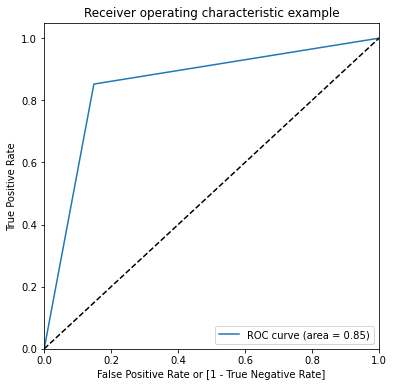

(array([0.        , 0.14838575, 1.        ]),
 array([0.        , 0.85224013, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [156]:
draw_roc(y_train_df.churn, y_train_df.final_predicted)

The roc curve is lying in the top left corner which is a sign of a good fit.

In [157]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.85


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.704298  0.975591  0.433005
0.2   0.2  0.773118  0.951964  0.594273
0.3   0.3  0.812497  0.922287  0.702707
0.4   0.4  0.837532  0.888437  0.786627
0.5   0.5  0.851927  0.852240  0.851614
0.6   0.6  0.850519  0.803474  0.897564
0.7   0.7  0.828561  0.729046  0.928076
0.8   0.8  0.782115  0.608147  0.956084
0.9   0.9  0.686930  0.392635  0.981224


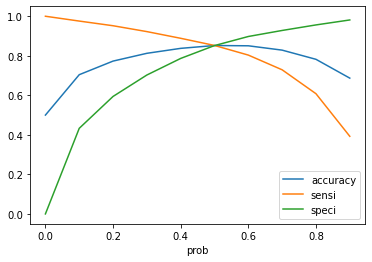

In [158]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

From the curve above, 0.5 is the optimum point. To increase senstivity of the model less choose optimal cut-off as 0.45

In [159]:

# predicting with the choosen cut-off on train
cut_off_prob = 0.45
y_train_df = predictChurnWithProb(model_logistic,X_train_res,y_train_res,cut_off_prob)

Roc_auc_score : 0.8462421113023522
Sensitivity/Recall : 0.8709122203098106
Specificity: 0.8215720022948939
False Positive Rate: 0.17842799770510614
Positive predictive value: 0.8299617277200656
Negative Predictive value: 0.864212432106216
sklearn precision score value: 0.8299617277200656


#### Making prediction on test

In [160]:

# predicting with the choosen cut-off on test
predictChurnWithProb(model_logistic,X_test,y_test,cut_off_prob)

Roc_auc_score : 0.8148522485871883
Sensitivity/Recall : 0.8082368082368082
Specificity: 0.8214676889375685
False Positive Rate: 0.17853231106243153
Positive predictive value: 0.2997613365155131
Negative Predictive value: 0.9784026670531961
sklearn precision score value: 0.2997613365155131


,churn,churn_Prob,final_predicted
10401,0,0.576690,1
11743,0,0.816765,1
13767,0,0.020166,0
5201,0,0.100077,0
8168,1,0.513301,1
...,...,...,...
12467,0,0.000866,0
1473,0,0.000500,0
24387,0,0.205513,0
1147,0,0.321719,0


The resulting model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.

- train sensitivity : 86.74%, train roc auc score : 84.51%
- test sensitivity : 80.43%, test roc auc score : 81.31%

## Decision Tree

In [161]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced',
                            max_features='auto',
                            min_samples_split=100,
                            min_samples_leaf=100,
                            max_depth=5,
                            criterion = "gini",
                            random_state=100)


In [162]:
# fit model
dt.fit(X_train_pca, y_train_res)
        
#Predict training set:
dtrain_predictions = dt.predict(X_train_pca)
dtrain_predprob = dt.predict_proba(X_train_pca)[:,1]
     
#Print model report:
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train_res, dtrain_predictions))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train_res, dtrain_predictions))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train_res, dtrain_predprob))


Model Report
Accuracy : 0.7654
Recall/Sensitivity : 0.6818
AUC Score (Train): 0.831523


In [163]:
# make predictions
pred_probs_test = dt.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7328884979487389
Sensitivity/Recall : 0.6203346203346203
Specificity: 0.8454423755628575
False Positive Rate: 0.15455762443714252
Positive predictive value: 0.2751141552511416
Negative Predictive value: 0.9592653962993648
sklearn precision score value: 0.2751141552511416


We see that AUC , Accuracy is low. Let try to Tune the model

#### Hyperparamter Tuning of the model

In [164]:
dt1 = DecisionTreeClassifier(class_weight='balanced',random_state=100)


params = {
    'max_depth': range(5, 15),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 50),
    'criterion': ["entropy", "gini"]
}


# # create 5 folds
# folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model_dt = GridSearchCV(estimator=dt1, cv=5, param_grid=params, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [165]:
model_dt.fit(X_train_pca, y_train_res)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  8.3min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 12.3min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 15.0min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 18.7min
[Parallel(n_jobs=4)]: Done 3600 out of 3600 | elapsed: 20.7min finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=4,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15),
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 50)},
             scoring='f1_weighted', verbose=1)

In [166]:
# print best hyperparameters
print("Best AUC: ", model_dt.best_score_)
print("Best hyperparameters: ", model_dt.best_params_)

Best AUC:  0.8439925788586597
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [167]:
# predict churn on test data
y_pred = model_dt.predict(X_test_pca)

getModelMetrics(y_test,y_pred)


Roc_auc_score : 0.7892823194028015
Sensitivity/Recall : 0.7361647361647362
Specificity: 0.8423999026408665
False Positive Rate: 0.1576000973591335
Positive predictive value: 0.306373861810391
Negative Predictive value: 0.9712361442402133
sklearn precision score value: 0.306373861810391


In [168]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5

y_train_df = predictChurnWithProb(model_dt,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

# pred_probs = model_dt.predict_proba(X_train_pca)[:,1]
    
# y_train_df= pd.DataFrame({'churn':y_train_res, 'churn_Prob':pred_probs})
#     # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
# y_train_df['final_predicted'] = y_train_df.churn_Prob.map( lambda x: 1 if x > cut_off_prob else 0)
    

Roc_auc_score : 0.8583946174307621
Sensitivity/Recall : 0.8602722578626193
Specificity: 0.8565169769989047
False Positive Rate: 0.14348302300109528
Positive predictive value: 0.85705378020265
Negative Predictive value: 0.8597455630595257
sklearn precision score value: 0.85705378020265


,churn,churn_Prob,final_predicted
0,0,0.867347,1
1,0,0.080000,0
2,1,0.355556,0
3,0,0.130000,0
4,0,0.005556,0


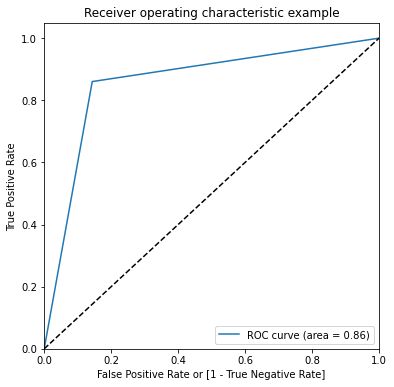

(array([0.        , 0.14348302, 1.        ]),
 array([0.        , 0.86027226, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [169]:
draw_roc(y_train_df.churn, y_train_df.final_predicted)

In [170]:
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.86


     prob  accuracy     sensi     speci
0.0   0.0  0.638007  1.000000  0.276013
0.1   0.1  0.747901  0.991029  0.504772
0.2   0.2  0.818208  0.963908  0.672508
0.3   0.3  0.841157  0.942002  0.740312
0.4   0.4  0.853361  0.911803  0.794920
0.5   0.5  0.858395  0.860272  0.856517
0.6   0.6  0.851145  0.796641  0.905649
0.7   0.7  0.833959  0.724352  0.943566
0.8   0.8  0.814009  0.664528  0.963490
0.9   0.9  0.750535  0.513170  0.987900


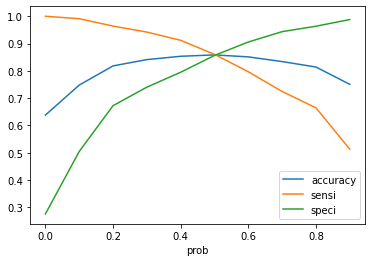

In [171]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

In [172]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.35
y_train_df = predictChurnWithProb(model_dt,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8464246596776718
Sensitivity/Recall : 0.9321441610598237
Specificity: 0.7607051582955198
False Positive Rate: 0.23929484170448026
Positive predictive value: 0.7957257346393588
Negative Predictive value: 0.9181039909354148
sklearn precision score value: 0.7957257346393588


In [173]:
# predicting with the choosen cut-off on test
predictChurnWithProb(model_dt,X_test_pca,y_test,cut_off_prob)

Roc_auc_score : 0.7734304481292433
Sensitivity/Recall : 0.8043758043758044
Specificity: 0.7424850918826822
False Positive Rate: 0.25751490811731775
Positive predictive value: 0.22801897117840203
Negative Predictive value: 0.9756916679993604
sklearn precision score value: 0.22801897117840203


,churn,churn_Prob,final_predicted
10401,0,0.792683,1
11743,0,0.888889,1
13767,0,0.008197,0
5201,0,0.087719,0
8168,1,0.000000,0
...,...,...,...
12467,0,0.000000,0
1473,0,0.000000,0
24387,0,0.114035,0
1147,0,0.581818,1


Decision tree after selecting optimal cut-off also is resulting in a model with

- Train Recall : 92.37% and Train Roc_auc_score : 84.62
- Test Recall : 78.76% and Test Roc_auc_score : 77.23

## Random Forest

In [174]:
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

### Hyperparameter tuning for Random Forest with Grid Search

In [175]:
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, 
                    cv=5, 
                   scoring="f1",return_train_score=True)
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='f1')

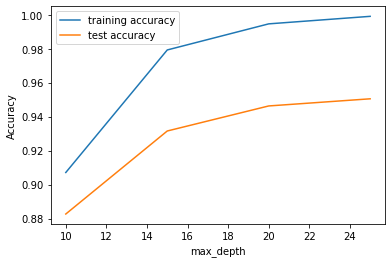

In [176]:
scores = rfgs.cv_results_
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [177]:
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth=20,random_state=10)
rfgs = GridSearchCV(rf1, parameters, 
                    cv=3, 
                   scoring="recall",return_train_score=True)

In [178]:
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, random_state=10),
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='recall')

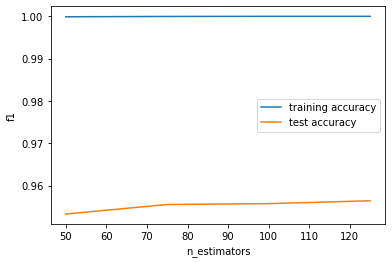

In [179]:
plot_traintestAcc(rfgs.cv_results_,'n_estimators')

In [180]:
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_depth=20,n_estimators=80,random_state=10)
rfgs = GridSearchCV(rf3, parameters, 
                    cv=5, 
                   scoring="f1",return_train_score=True)

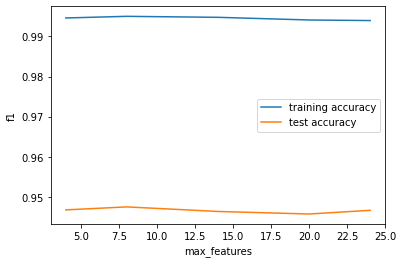

In [181]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'max_features')

In [182]:
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,random_state=10)
rfgs = GridSearchCV(rf4, parameters, 
                    cv=3, 
                   scoring="f1",return_train_score=True)


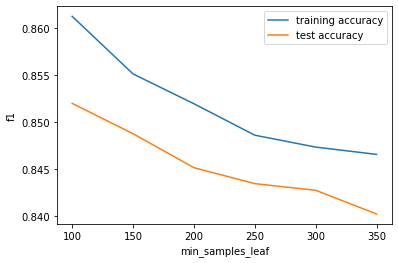

In [183]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'min_samples_leaf')

In [184]:
parameters = {'min_samples_split': range(50, 300, 50)}
rf5 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(rf5, parameters, 
                    cv=3, 
                   scoring="f1",return_train_score=True)

In [185]:
rf_final = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=5,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)

In [186]:

rf_final.fit(X_train_pca, y_train_res)

print("Model performance on Train data:")

dtrain_predictions = rf_final.predict(X_train_pca)
dtrain_predprob = rf_final.predict_proba(X_train_pca)[:,1]
  
# Print model report
print ("\nModel Report")
print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train_res, dtrain_predictions))
print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train_res, dtrain_predictions))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train_res, dtrain_predprob))
    
# modelfit(rf_final,X_train_pca,y_train_res)

Model performance on Train data:

Model Report
Accuracy : 0.8691
Recall/Sensitivity : 0.8514
AUC Score (Train): 0.948110


In [187]:
# predict on test data
predictions = rf_final.predict(X_test_pca)

In [188]:
print("Model performance on Test data:")
getModelMetrics(y_test,predictions)

Model performance on Test data:
Roc_auc_score : 0.8018415066607837
Sensitivity/Recall : 0.7258687258687259
Specificity: 0.8778142874528416
False Positive Rate: 0.12218571254715833
Positive predictive value: 0.3596938775510204
Negative Predictive value: 0.971316994344196
sklearn precision score value: 0.3596938775510204


In [189]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8691388932352788
Sensitivity/Recall : 0.8514056224899599
Specificity: 0.8868721639805978
False Positive Rate: 0.11312783601940228
Positive predictive value: 0.8827123776564105
Negative Predictive value: 0.8564952400141037
sklearn precision score value: 0.8827123776564105


,churn,churn_Prob,final_predicted
0,0,0.776264,1
1,0,0.216658,0
2,1,0.669960,1
3,0,0.263313,0
4,0,0.175555,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.566239  1.000000  0.132478
0.2   0.2  0.743885  0.994367  0.493402
0.3   0.3  0.841626  0.960309  0.722944
0.4   0.4  0.866505  0.907891  0.825119
0.5   0.5  0.869139  0.851406  0.886872
0.6   0.6  0.857821  0.786679  0.928963
0.7   0.7  0.823580  0.686434  0.960726
0.8   0.8  0.754081  0.521671  0.986491
0.9   0.9  0.612919  0.227247  0.998592


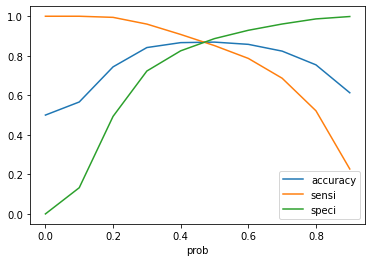

In [190]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [191]:
cut_off_prob=0.35
predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.858916184217389
Sensitivity/Recall : 0.9350127783862724
Specificity: 0.7828195900485058
False Positive Rate: 0.2171804099514943
Positive predictive value: 0.811506948531076
Negative Predictive value: 0.9233466625653645
sklearn precision score value: 0.811506948531076


,churn,churn_Prob,final_predicted
0,0,0.776264,1
1,0,0.216658,0
2,1,0.669960,1
3,0,0.263313,0
4,0,0.175555,0
...,...,...,...
38341,1,0.818010,1
38342,1,0.967562,1
38343,1,0.582220,1
38344,1,0.797793,1


In [192]:
y_test_df= predictChurnWithProb(rf_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8007734694481683
Sensitivity/Recall : 0.8275418275418276
Specificity: 0.7740051113545089
False Positive Rate: 0.22599488864549105
Positive predictive value: 0.2572
Negative Predictive value: 0.9793655682168155
sklearn precision score value: 0.2572


,churn,churn_Prob,final_predicted
10401,0,0.692564,1
11743,0,0.788374,1
13767,0,0.096859,0
5201,0,0.171597,0
8168,1,0.304976,0


## Final Choice of Model

Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives.

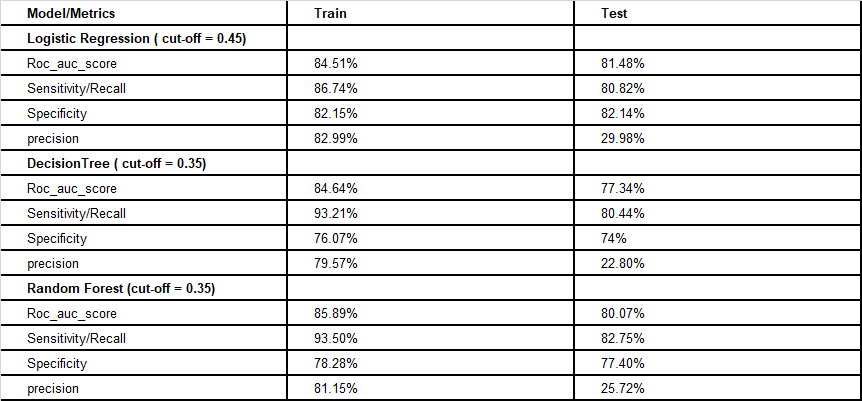

Overall, the Logistic Regression model with probability cut-off = 0.45, performs best. It achieved the best recall accuracy of 81.48% for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting. The precision is compromised in this effort but the business objective to predict Churn customers is most accuratety captured by it. 

Random Forest also giving similar while sensitivity with Logistic Regression however Logistic Regression is way faster than Random Forest.

Hence we recommend Logistic Regression for predicting Churn customers

### Create A Interpretabile Model For Finding Important driver Variables

We will use Random Forest to derive Important Features

### Random Forest for churn driver features

In [205]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12, 15, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1)

In [206]:
# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 17.7min
[Parallel(n_jobs=4)]: Done 324 out of 324 | elapsed: 31.5min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [8, 10, 12], 'max_features': [12, 15, 20],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [207]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9033015177593491 using {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [208]:

rf = RandomForestClassifier(max_depth=12,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=300,
                            random_state=10)

In [209]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=12, max_features=20, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300,
                       random_state=10)

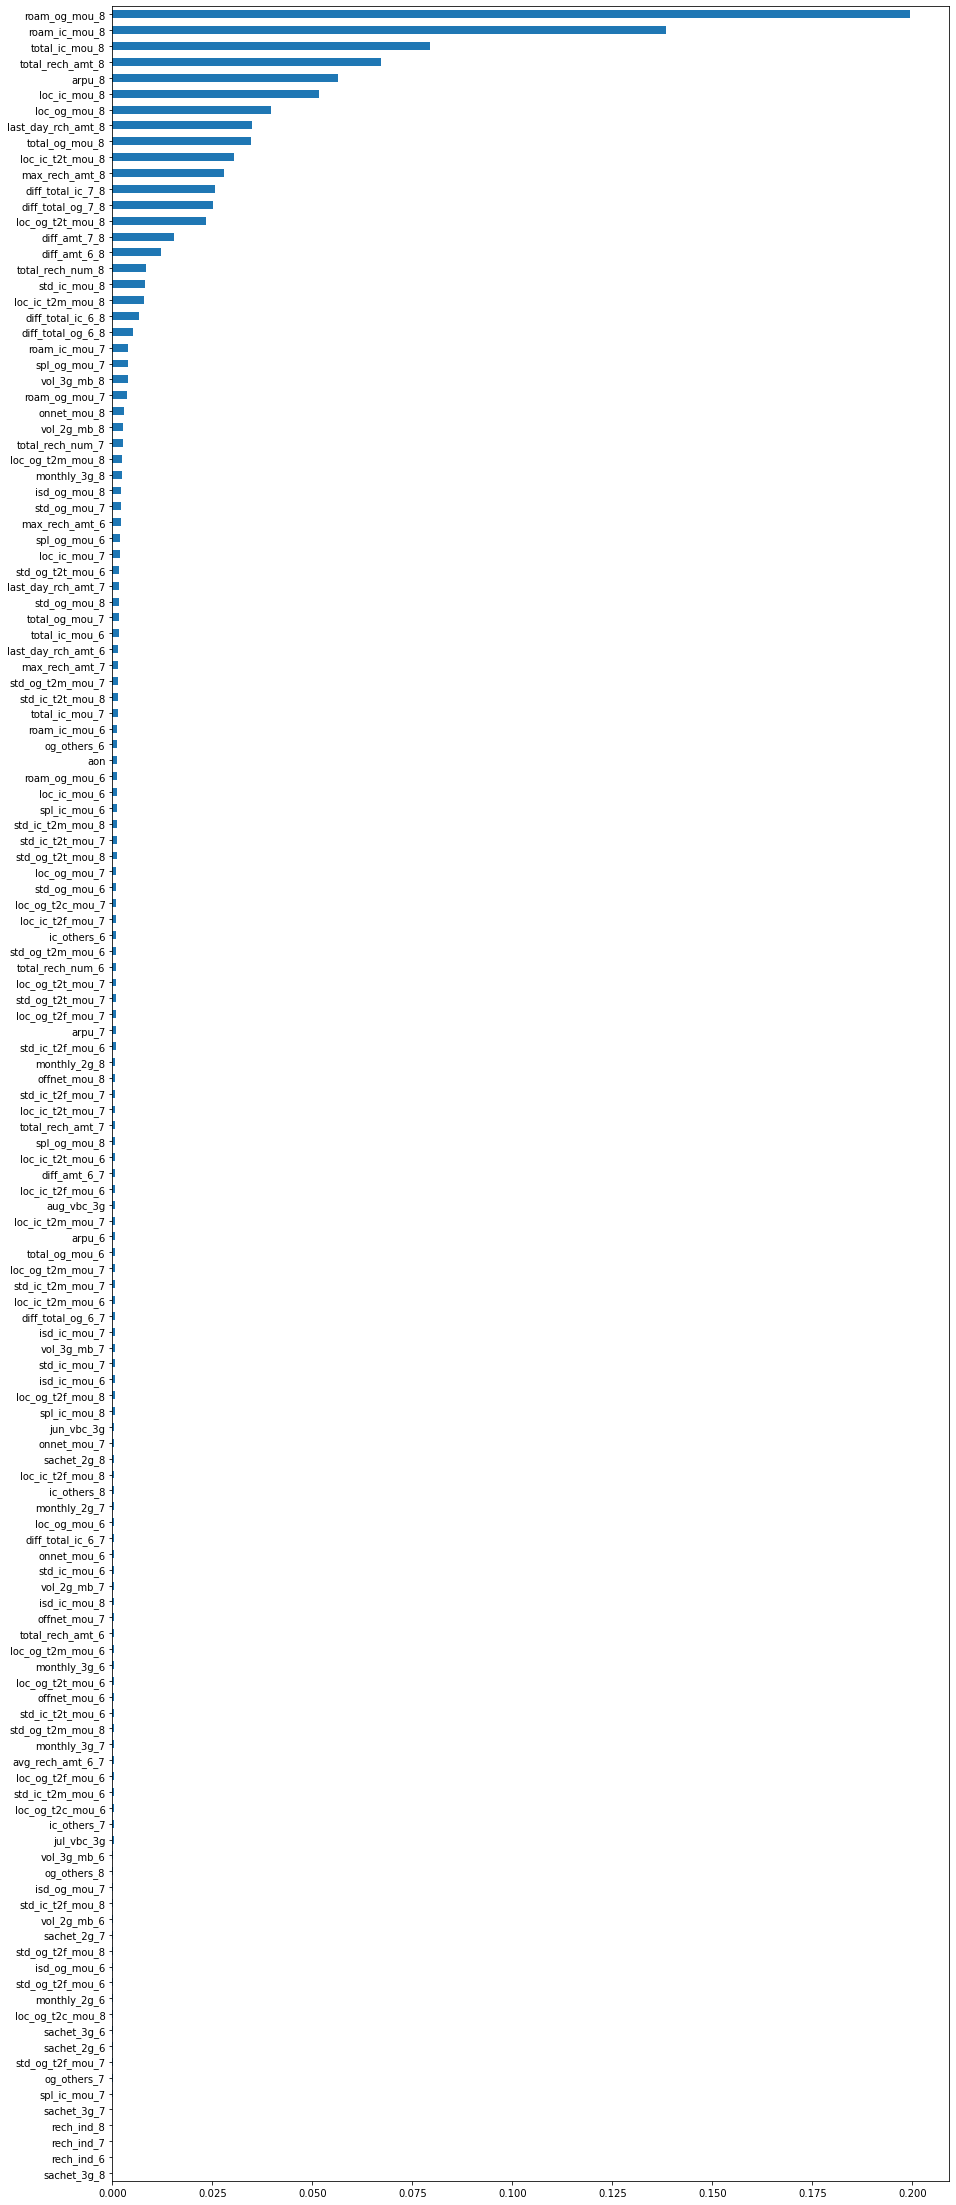

In [210]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

## Business Insights

Some of the top main predictiors of churn are the monthly KPI features for the action phase (3rd month August).

the graph above suggest that the top 25 features ranked in order of importance as produced by our RandomForest implementation are the features that belong to month 8 i.e., the action month. Hence, it is clear that what happens in the action phase has a direct impact on the customer churn of high value customers. Specifically, these features are as follows:

1. roam_og_mou_8 -- outgoing roaming calls minutes of usage in month 8
2. roam_ic_mou_8 -- incoming roaming calls minutes of usage in month 8
3. total_ic_mou_8 -- Total incoming minutes of usage in month 8
4. total_rech_amt_8 -- total recharge amount in month 8
5. arpu_8 -- average revenue per user in month 8
6. loc_ic_mou_8 -- local incoming minutes of usage in month 8
7. loc_og_mou_8 -- local outgoing calls minutes of usage in month 8
8. last_day_rch_amt_8 -- last (most recent) recharge amount in month 8
9. total_og_mou_8 -- Total outgoing in month 8
10. loc_ic_t2t_mou_8 -- local incoming calls from same operator minutes of usage in month 8
11. max_rech_amt_8 -- maximum recharge amount in month 8
12. diff_total_ic_7_8 -- Difference between total incoming between 7 and 8 month
13. diff_total_og_7_8 -- Difference between total outgoing between 7 and 8 month
14. loc_og_t2t_mou_8 -- local outgoing mou in month 8
15. diff_amt_7_8 -- Difference of total recharge amount between 7 and 8 months


Roaming outgoing and incoming , along with total incoming , total recharge amount and arpu for 8th month have a very important role for churn predictions. Reduction in these KPI's forms a clear indicator of churn.

Overall, drop in any of these indicator KPI is a signal that the customer is not actively engaging in the services offered by the Network operator and thus may choose to churn in the near future.

Next, we will look at some of the stratergic steps which can be taken to retain these predicted churners.

## Strategies to manage customer churn

It is a fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

Monitoring Drop in usage
Customer churn seems to be well predicted by drop in usage.

Aside from using the Machine Learning model for predicting churn, the telecom company should pay close attention to drop in MoU, ARPU and recharge amount month over month. If feasible, the company should track these customers and offer them free minutes on roaming depending upon arpu. 

Contact these customers proactively to find out what's affecting their experience. Marketing team must come up with campaigns which targets these high-value to-be churner.